In [4]:
import numpy as np
import MDAnalysis as mda
import matplotlib.pyplot as plt
#from MDAnalysis.tests.datafiles import PDB_small
from MDAnalysis.analysis import distances
%matplotlib inline

# Load the trajectory and topology
#Z='../../project/gromacs/fi/ah8_30A'
Z= '1_curved15_45A'
#Z= '2_scratch15_30A'
#Z= '3_bound15_15A'
#Z= '4_tandem_30A'
#Z= '5_tandem_15A'
#Z= '6_tandem_CT2_30A'
#Z= '7_tandem_ex_CT2_30A'
N=1

tpr_file  = f'{Z}/N{N}/step7_400.nowat.tpr'
traj_file = f'{Z}/N{N}/traj_continuous_v1_400_reduced.xtc'
#tpr_file  = f'{Z}/N{N}/step7_400.pdb'
u = mda.Universe(tpr_file, traj_file)


In [5]:
bound_ca = u.select_atoms('name CA and resid 1-34')
float_ca = u.select_atoms('name CA and not resid 1-34')
ca_float_inds = float_ca.indices
ca_float_res = float_ca.residues
ca_bound_inds = bound_ca.indices
ca_bound_res = bound_ca.residues
n_bound = len(bound_ca)
n_float = len(float_ca)


phos = u.select_atoms('name P')
phos_inds = phos.indices
phos_res = phos.residues
phos_com =phos.center_of_mass(compound='residues')
phos_com_ave_up = np.mean(phos_com[:40], axis=0)# [-100:] [:100]
phos_com_ave_low = np.mean(phos_com[-40:], axis=0)# [-100:] [:100]
midline= (phos_com_ave_up+phos_com_ave_low)/2

print(midline[2])# from 143 lower leaflet
#float_com =float_ca.center_of_mass(compound='residues')
#bound_com =bound_ca.center_of_mass(compound='residues')

#print(float_com, n_float)
#print(bound_com, len(ca_bound_inds))
#print(ca_res, len(ca_res),ca_float_inds)
#print(phos_com, len(phos_inds))
bound_ca.resids
print(phos_com_ave_low[2], midline[2],  phos_com_ave_up[2])
phos_com_ave_up-midline[2]


68.45737810134888
48.669752502441405 68.45737810134888 88.24500370025635


array([-16.66087527, -14.03687552,  19.7876256 ])

In [20]:
# Get the atom selection for the specified residue IDs
residue_cter = [445, 462, 478, 500, 522, 533, 550, 569]#[446,463,479,501,523,534,551,570] # C-term 
residue_ah = [137, 156, 171, 186, 205, 222, 229, 251, 267, 289, 311, 330, 345, 360, 377, 393, 415, 426]#[138,157,172,187,206,223,230,252,268,290,312,331,346,361,378,394,416,427] # AH domain
residue_nter = [3, 18, 42, 61, 85, 104, 118, 125]# [4,19,43,62,86,105,119,126]  # N-term

residue_cter = [47702, 47719, 47735, 47757, 47779, 47790, 47807, 47826]# C-term          
residue_ah = [47394, 47413, 47428, 47443, 47462, 47479, 47486, 47508, 47524, 47546, 47568, 47587, 47602, 47617, 47634, 47650, 47672, 47683]#ca_float_inds[8:26]
residue_nter =[47260, 47275, 47299, 47318, 47342, 47361, 47375, 47382] #ca_float_inds[:8]

#residue_selection = "resid " + " ".join(map(str, residue_cter))
residue_selection = "index " + " ".join(map(str, residue_cter)) # inex or resid!
selected_cter = u.select_atoms(residue_selection)

residue_selection1 = "index " + " ".join(map(str, residue_ah))
selected_ah = u.select_atoms(residue_selection1)

residue_selection2 = "index " + " ".join(map(str, residue_nter))
selected_nter = u.select_atoms(residue_selection2)

residue_selection3 = "index " + " ".join(map(str, phos_inds[:40]))
selected_phos = u.select_atoms(residue_selection3)

print(selected_cter, type(selected_cter))

# Empty lists to store the COM z-component and corresponding time.
com_z = []
com_z1 = []
com_z2 = []
com_z3 = []
time_values = []

# Iterate over each frame in the trajectory.
for ts in u.trajectory:
    # Calculate the center of mass for the selected residues.
    com = selected_cter.center_of_mass(compound='residues')
    #print(com)
    com_ave = np.mean(com, axis=0)
    #print(com_ave)
    com_z.append(com_ave[2])  # Z-component is at index 2 in the COM array.
    time_values.append(ts.time)
    

    com1 = selected_ah.center_of_mass(compound='residues')
    com_ave1 = np.mean(com1, axis=0)
    com_z1.append(com_ave1[2])  # Z-component is at index 2 in the COM array.

    com2 = selected_nter.center_of_mass(compound='residues')
    com_ave2 = np.mean(com2, axis=0)
    com_z2.append(com_ave2[2])  # Z-component is at index 2 in the COM array.

    com3 = selected_phos.center_of_mass(compound='residues')
    com_ave3 = np.mean(com3, axis=0)
    com_z3.append(com_ave3[2])  # Z-component is at index 2 in the COM array.

time_values = np.array(time_values)/1000  # ps to ns
#com_z = np.array(com_z)/2
com_z = np.array(com_z-midline[2])
com_z1 = np.array(com_z1-midline[2])
com_z2 = np.array(com_z2-midline[2])
com_z3 = np.array(com_z3-midline[2])
print(com_z)
print(com_z2)

#print(com_ave, np.shape(com_z),time_values[-1], type(time_values))

<AtomGroup [<Atom 47703: CA of type OT of resname GLN, resid 820 and segid seg_0_Title>, <Atom 47720: CA of type HT of resname VAL, resid 837 and segid seg_0_Title>, <Atom 47736: CA of type OT of resname LYS, resid 853 and segid seg_0_Title>, <Atom 47758: CA of type HT of resname LYS, resid 875 and segid seg_0_Title>, <Atom 47780: CA of type HT of resname SER, resid 897 and segid seg_0_Title>, <Atom 47791: CA of type HT of resname HSD, resid 908 and segid seg_0_Title>, <Atom 47808: CA of type OT of resname LEU, resid 925 and segid seg_0_Title>, <Atom 47827: CA of type HT of resname LYS, resid 944 and segid seg_0_Title>]> <class 'MDAnalysis.core.groups.AtomGroup'>
[47.38137655 46.86762552 41.92512541 ... 35.86637812 34.78637629
 35.62887602]
[44.94512873 46.30887823 46.81512575 ... 29.23262815 28.00262671
 29.41887789]


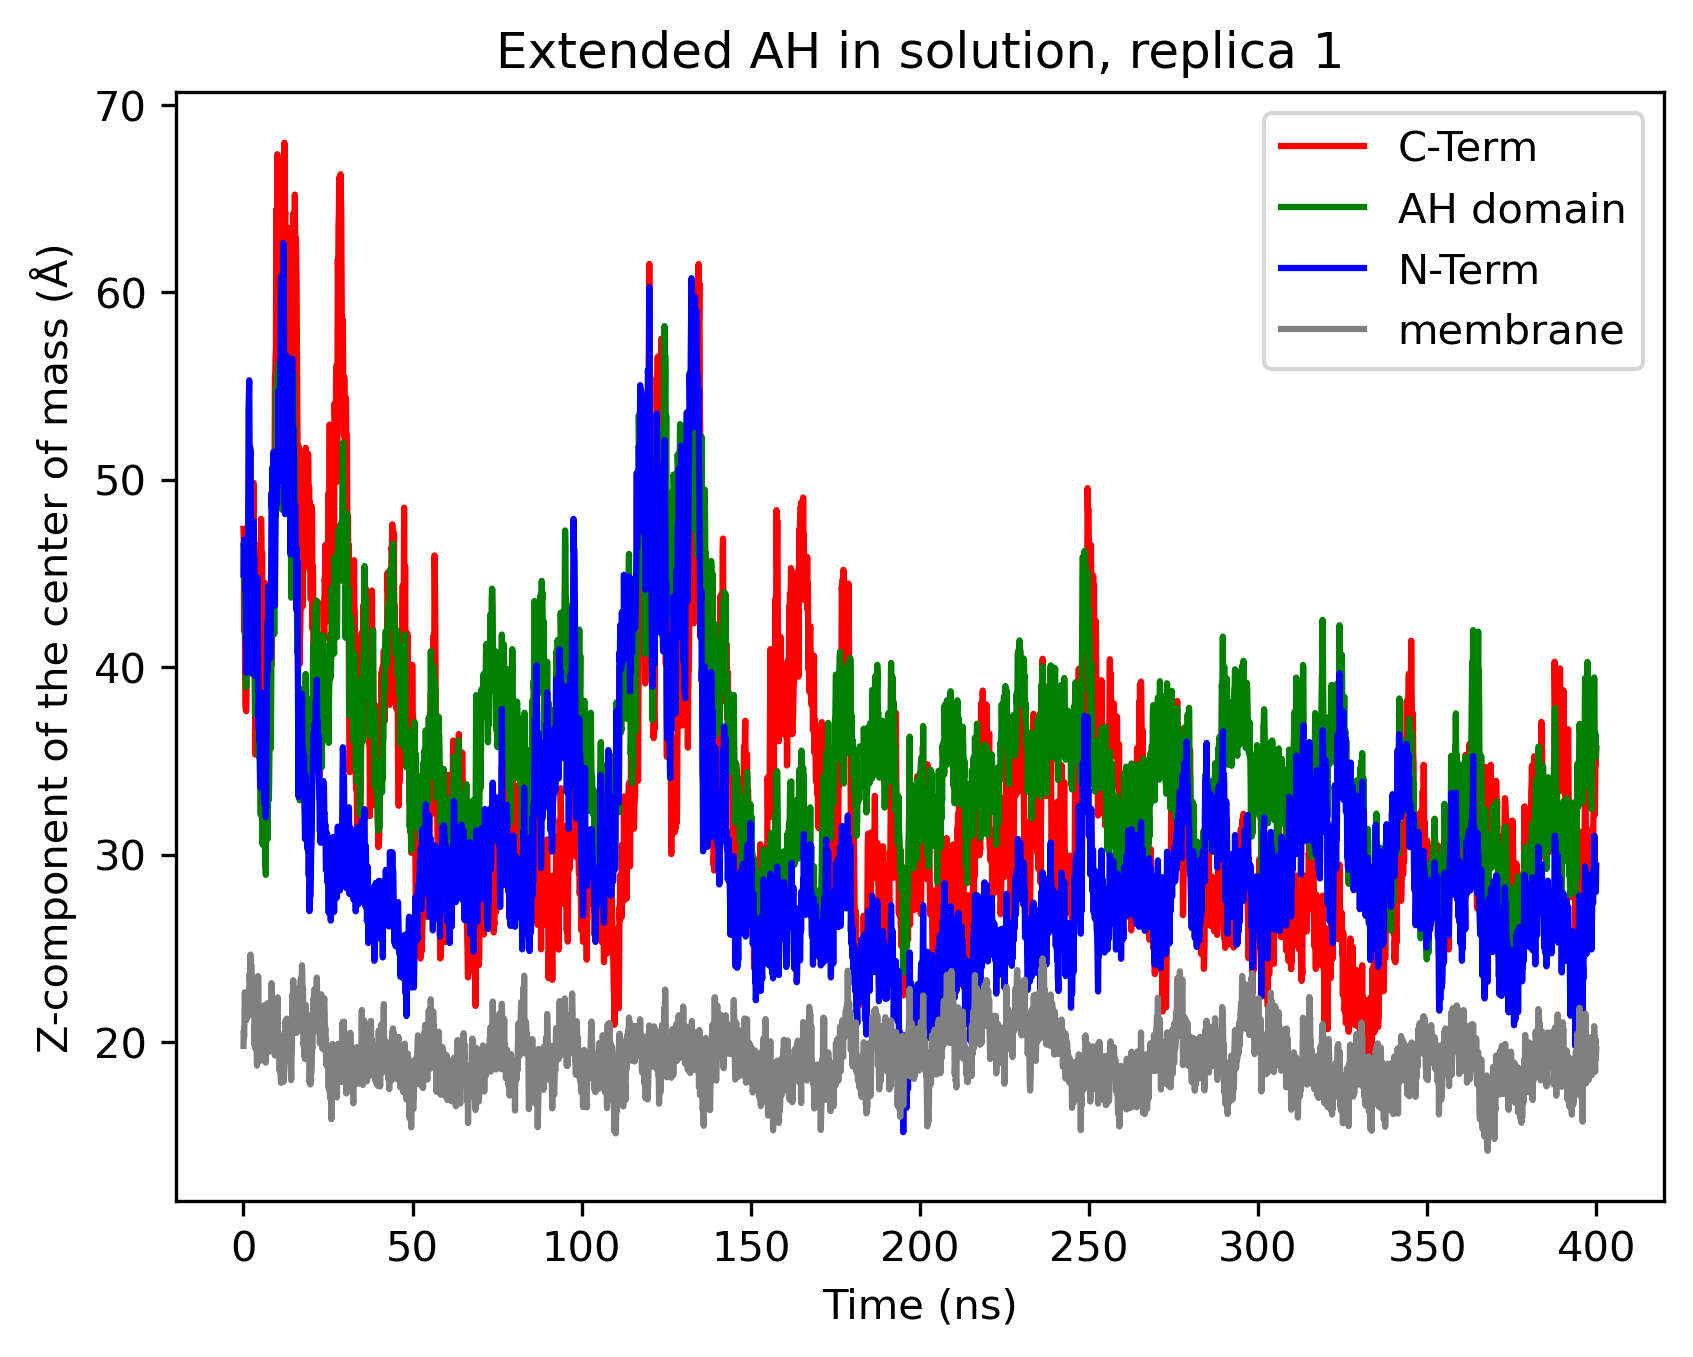

In [13]:
# Plot the z-component of the center of mass over time.

fig = plt.figure(dpi=300)

plt.plot(time_values, com_z, label='C-Term', color='red')
plt.plot(time_values, com_z1, label='AH domain', color='green')
plt.plot(time_values, com_z2, label='N-Term', color='blue')
plt.plot(time_values, com_z3, label='membrane', color='gray')

plt.xlabel('Time (ns)')
plt.ylabel('Z-component of the center of mass (Å)')
plt.title(f'Extended AH in solution, replica {N}')
plt.legend(loc="upper right")
#plt.xlim(50,150)
plt.show()


#plt.savefig('Cterm_direction.png',bbox_inches="tight")

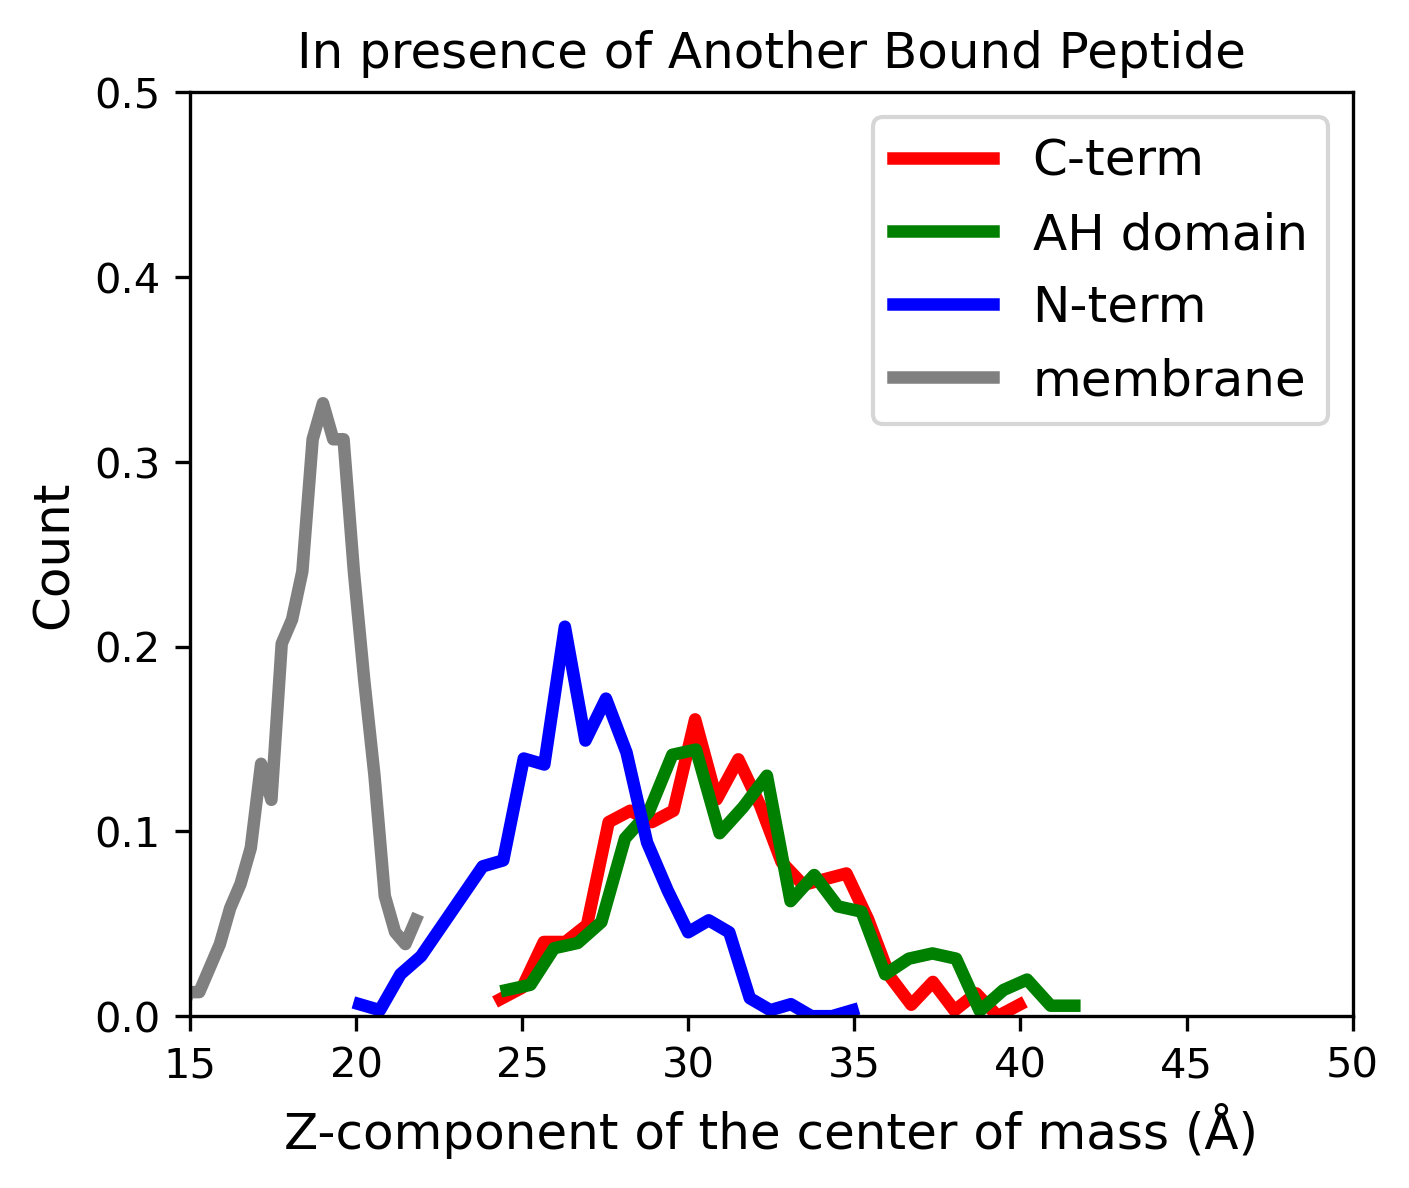

In [6]:
def makehist(data, datalabel, colormark):
  y,binEdges = np.histogram(data,bins=25)
  bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
  #bincenters = bincenters/10.0
  plt.plot(bincenters, y/np.trapz(y, bincenters), label=datalabel, lw =3, color=colormark)
  

fig, ax = plt.subplots(figsize=(5,4),dpi=300)
makehist(com_z[-500:], 'C-term', 'red')
makehist(com_z1[-500:], 'AH domain', 'green')
makehist(com_z2[-500:], 'N-term', 'blue')
makehist(com_z3[-500:], 'membrane', 'gray')


plt.xlabel('Z-component of the center of mass (Å)',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('In presence of Another Bound Peptide',fontsize=12)
plt.legend(loc="upper right",fontsize=12)
plt.xlim(15,50)
plt.ylim(0,0.5)

plt.savefig(f'z_histogram_{Z}__{N}.png',bbox_inches="tight")
#plt.savefig(f'z_histogram_{Z}__{N}.eps', format='eps')

In [25]:
# Z-time plot for all replicas

import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

Z= '1_curved15_45A'
#Z= '2_scratch15_30A'
#Z= '3_bound15_15A'
#Z= '4_tandem_30A'
#Z= '5_tandem_15A'
#Z= '6_tandem_CT2_30A'
#Z= '7_tandem_ex_CT2_30A'

# Number of replicas
num_replicas = 8

tpr_file  = f'{Z}/N{N}/step7_400.nowat.tpr'
traj_file = f'{Z}/N{N}/traj_continuous_v1_400_reduced.xtc'
#tpr_file  = f'{Z}/N{N}/step7_400.pdb'
u = mda.Universe(tpr_file, traj_file)

# Get the atom selection for the specified residue IDs
#residue_cter = [445, 462, 478, 500, 522, 533, 550, 569]#[446,463,479,501,523,534,551,570] # C-term
#residue_ah = [137, 156, 171, 186, 205, 222, 229, 251, 267, 289, 311, 330, 345, 360, 377, 393, 415, 426] # AH domain
#residue_nter = [3, 18, 42, 61, 85, 104, 118, 125]# [4,19,43,62,86,105,119,126]  # N-term

residue_cter = [47702, 47719, 47735, 47757, 47779, 47790, 47807, 47826]# C-term          
residue_ah = [47394, 47413, 47428, 47443, 47462, 47479, 47486, 47508, 47524, 47546, 47568, 47587, 47602, 47617, 47634, 47650, 47672, 47683]#ca_float_inds[8:26]
residue_nter =[47260, 47275, 47299, 47318, 47342, 47361, 47375, 47382] #ca_float_inds[:8]

phos = u.select_atoms('name P')
phos_inds = phos.indices

# Initialize lists to store COM data for each replica
com_z_replicas = [[] for _ in range(num_replicas)]
com_z1_replicas = [[] for _ in range(num_replicas)]
com_z2_replicas = [[] for _ in range(num_replicas)]
com_z3_replicas = [[] for _ in range(num_replicas)]
time_values = []

# Loop over each replica
for replica in range(1, num_replicas + 1):
    # Load the trajectory and topology for the current replica
    u = mda.Universe(f'{Z}/N{replica}/step7_400.nowat.tpr', 
                     f'{Z}/N{replica}/traj_continuous_v1_400_reduced.xtc')

    # Get the atom selection for the specified residue IDs
    # ... (Your existing residue ID selections here) ...

    # Empty lists to store the COM z-component and corresponding time for the current replica.
    com_z = []  # cter
    com_z1 = [] # AH
    com_z2 = [] # nter
    com_z3 = [] # phophate

    residue_selection = "index " + " ".join(map(str, residue_cter)) # inex or resid!
    selected_cter = u.select_atoms(residue_selection)

    residue_selection1 = "index " + " ".join(map(str, residue_ah))
    selected_ah = u.select_atoms(residue_selection1)
    
    residue_selection2 = "index " + " ".join(map(str, residue_nter))
    selected_nter = u.select_atoms(residue_selection2)

    residue_selection3 = "index " + " ".join(map(str, phos_inds[:40]))
    selected_phos = u.select_atoms(residue_selection3)

    # Iterate over each frame in the trajectory.
    for ts in u.trajectory:
        # Calculate the center of mass for the selected residues.
        com = selected_cter.center_of_mass(compound='residues')
        com1 = selected_ah.center_of_mass(compound='residues')
        com2 = selected_nter.center_of_mass(compound='residues')
        com3 = selected_phos.center_of_mass(compound='residues')

        com_ave = np.mean(com, axis=0)
        com_ave1 = np.mean(com1, axis=0)
        com_ave2 = np.mean(com2, axis=0)
        com_ave3 = np.mean(com3, axis=0)
        
        com_z.append(com_ave[2])  # Z-component is at index 2 in the COM array.
        com_z1.append(com_ave1[2])
        com_z2.append(com_ave2[2])
        com_z3.append(com_ave3[2])

    com_z = np.array (com_z )
    com_z1 = np.array(com_z1)
    com_z2 = np.array(com_z2)
    com_z3 = np.array(com_z3)

    time_values = [ts.time for ts in u.trajectory]
    time_values = np.array(time_values) / 1000  # ps to ns

    # Store the COM z-component data for the current replica
    com_z_replicas[replica - 1] =  abs(com_z -midline[2])
    com_z1_replicas[replica - 1] = abs(com_z1-midline[2])
    com_z2_replicas[replica - 1] = abs(com_z2-midline[2])
    com_z3_replicas[replica - 1] = abs(com_z3-midline[2])

com_z1_replicas[2][4000]



32.53040511873033

In [26]:
np.size(com_z2_replicas)

32008

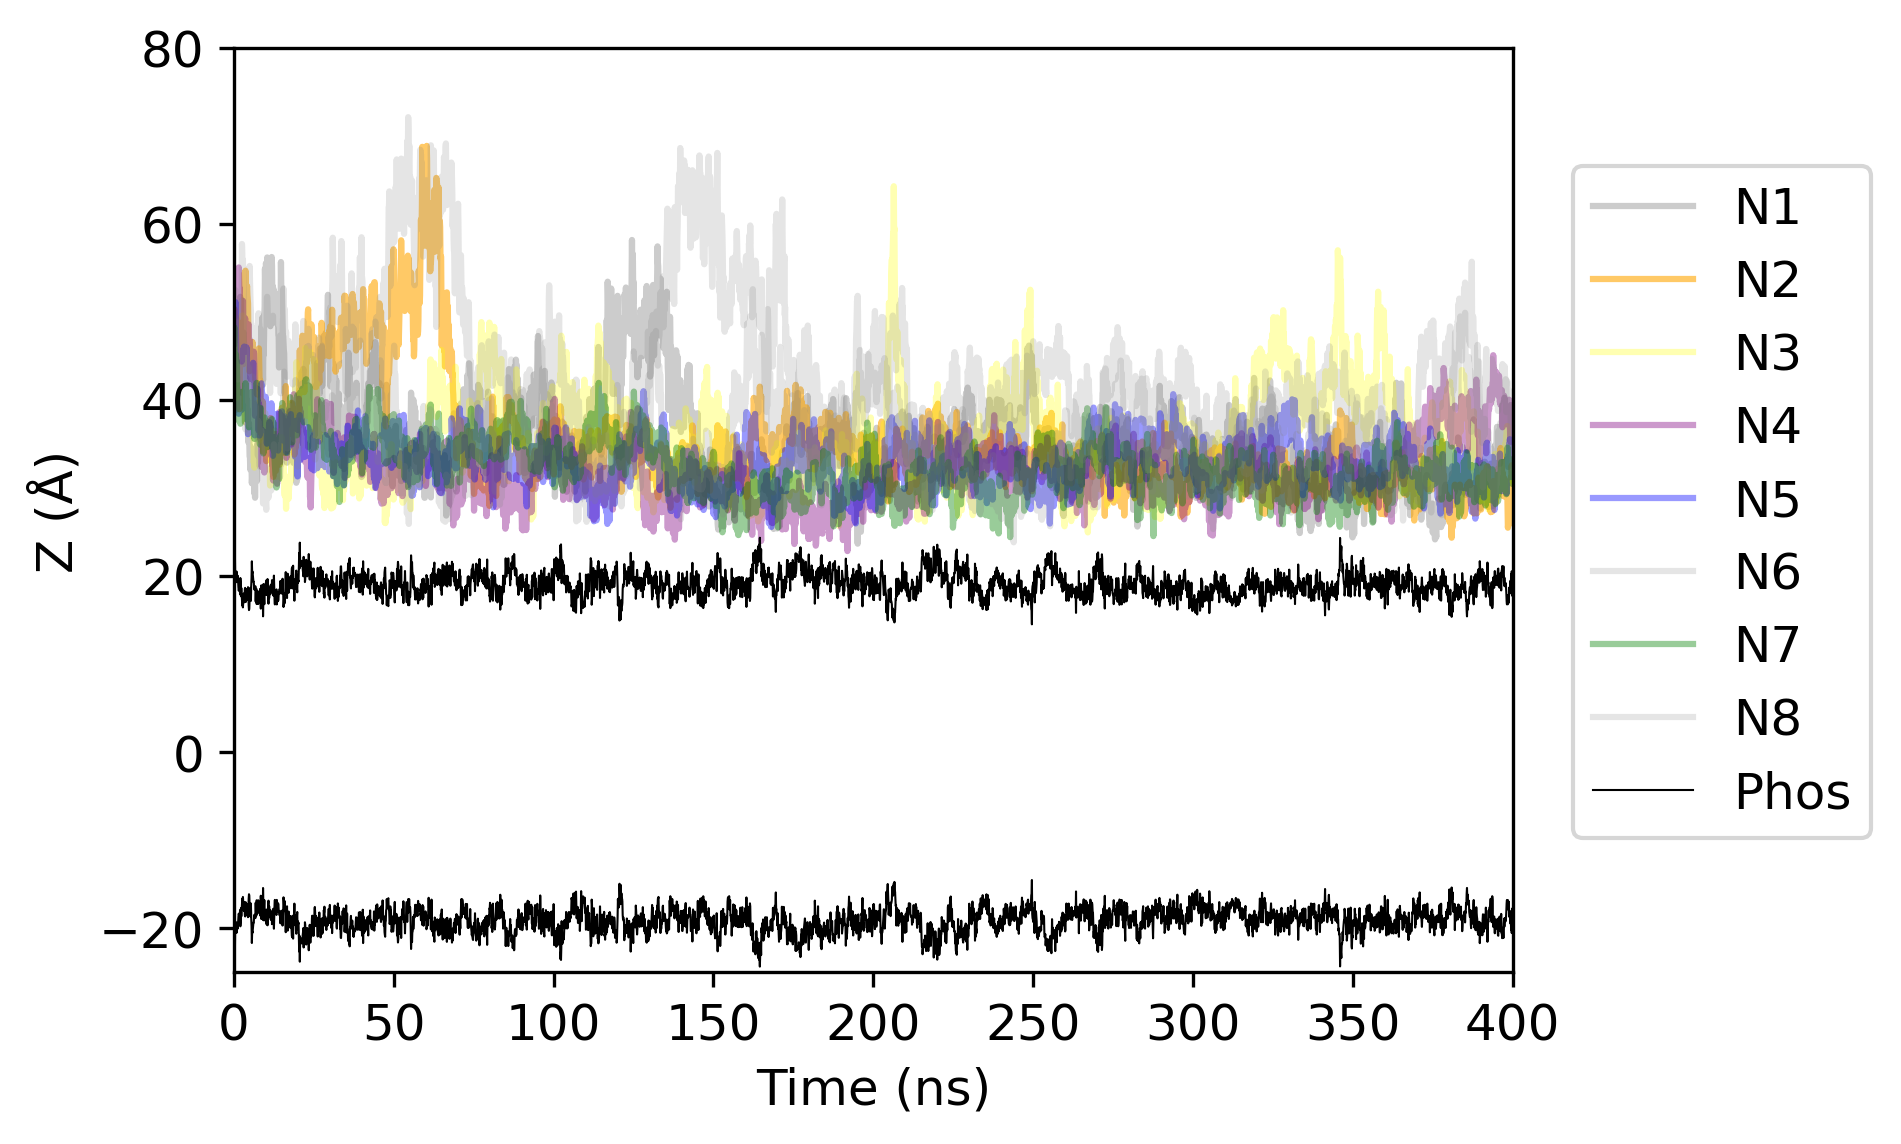

In [146]:
fig, ax = plt.subplots(figsize=(5.5,4),dpi=300)
plt.plot(time_values, com_z1_replicas[0], label='N1', color='gray', alpha=0.4)
plt.plot(time_values, com_z1_replicas[1], label='N2', color='orange', alpha=0.6)
plt.plot(time_values, com_z1_replicas[2], label='N3', color='yellow', alpha=0.3)
plt.plot(time_values, com_z1_replicas[3], label='N4', color='purple', alpha=0.4)

plt.plot(time_values, com_z1_replicas[4], label='N5', color='blue', alpha=0.4)
plt.plot(time_values, com_z1_replicas[5], label='N6', color='gray', alpha=0.2)
plt.plot(time_values, com_z1_replicas[6], label='N7', color='green', alpha=0.4)
plt.plot(time_values, com_z1_replicas[7], label='N8', color='gray', alpha=0.2)



plt.plot(time_values, com_z3_replicas[1], label='Phos', color='black', linewidth =0.5)
plt.plot(time_values, -com_z3_replicas[1], color='black', linewidth =0.5)


plt.xlabel('Time (ns)',fontsize=12)
plt.ylabel('Z (Å)',fontsize=12)
#plt.title('In Presense of Bounde Peptide, All Replicas')
plt.legend(loc="upper right",fontsize=12, bbox_to_anchor=(1.3, 0.9))
plt.xlim(0, 400)
plt.ylim(-25, 80)
plt.yticks(rotation=0,fontsize=12)
plt.xticks(rotation=0,fontsize=12)

plt.savefig(f'AH_Z_dist_{Z}.png',bbox_inches="tight")




add side histogram

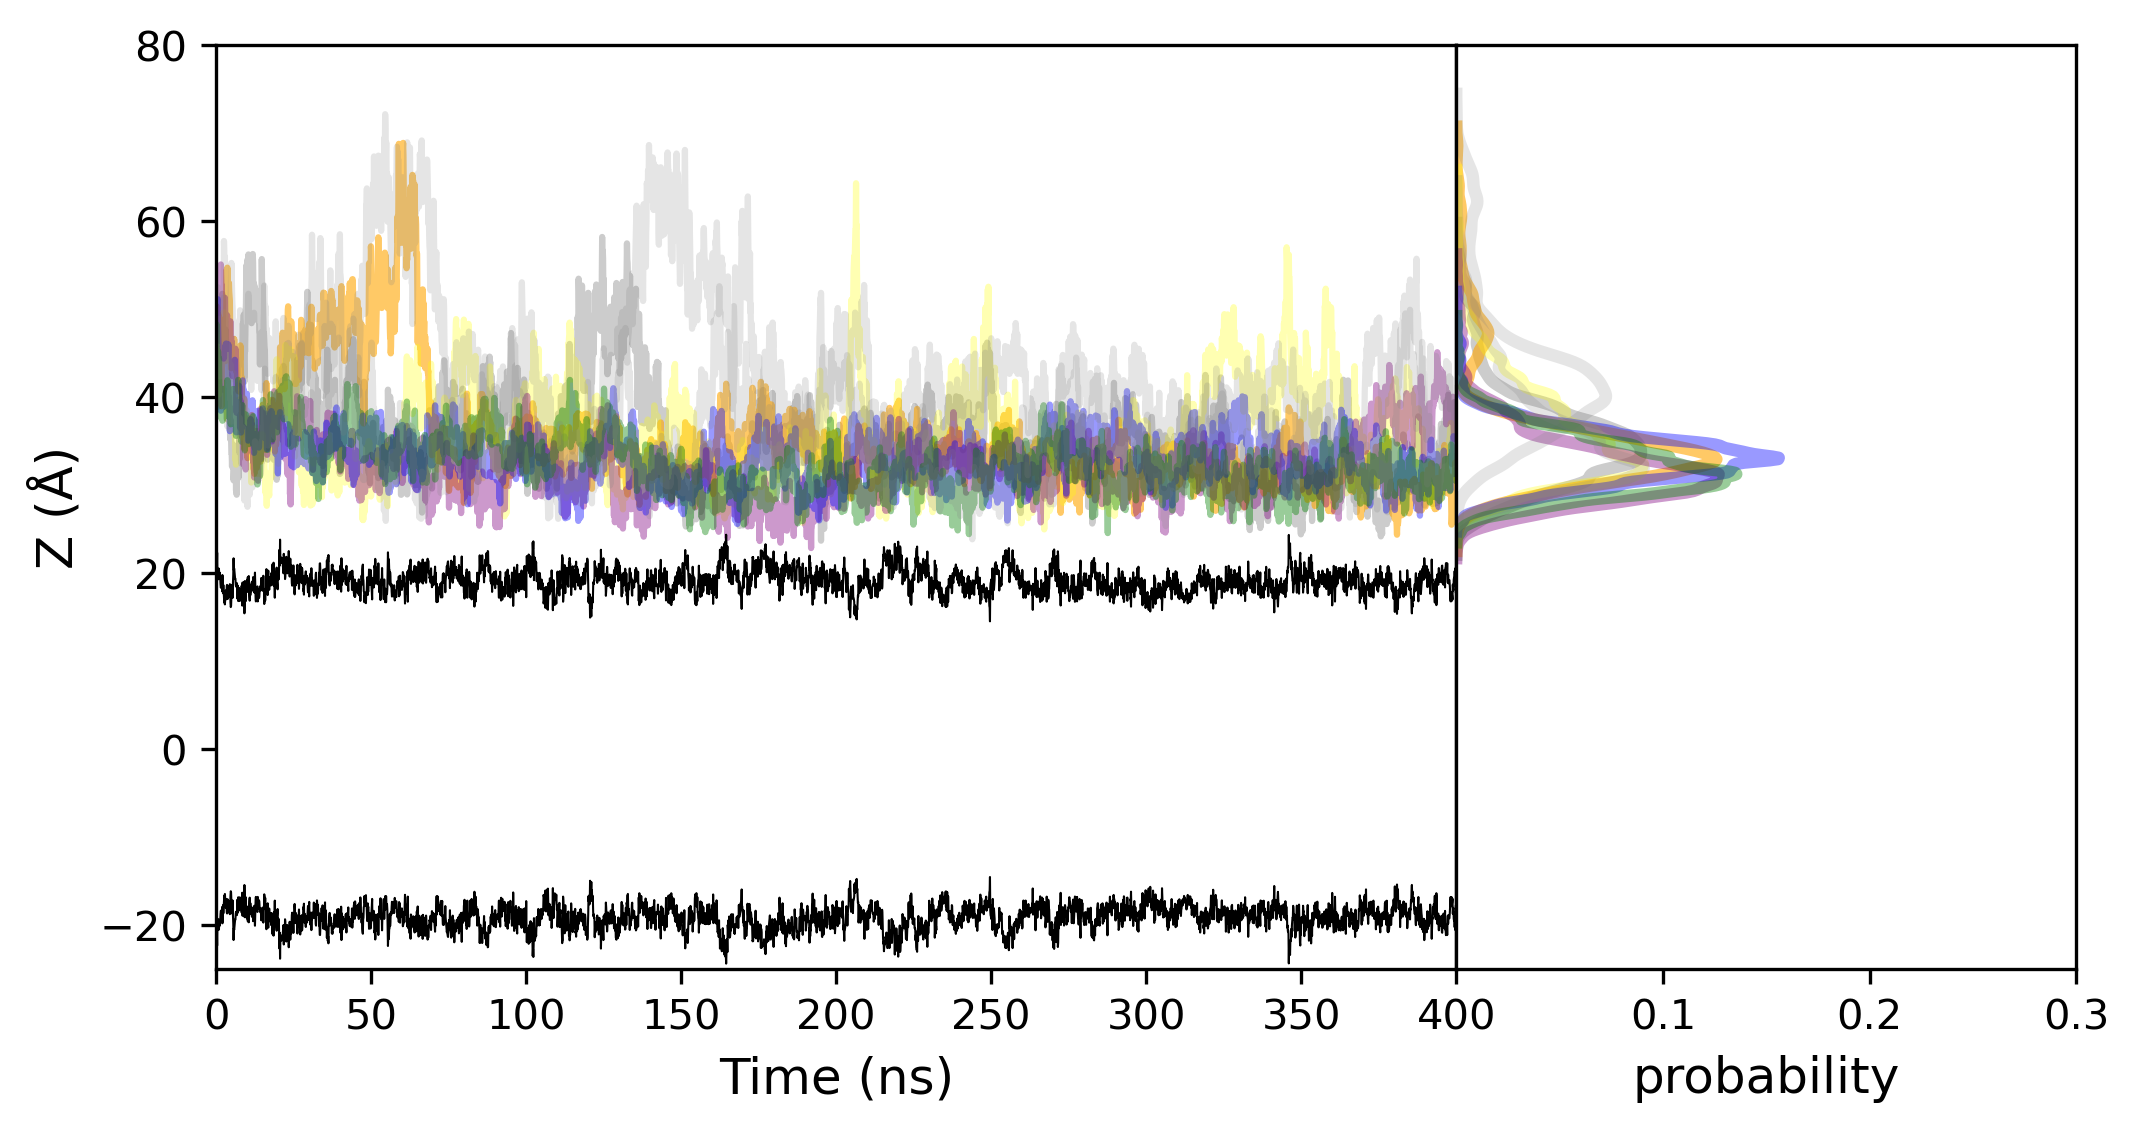

In [145]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import gaussian_kde

colors = ['gray', 'orange', 'yellow', 'purple', 'blue', 'gray', 'green', 'gray']
alphas = [0.4, 0.6, 0.3, 0.4, 0.4, 0.2, 0.4, 0.2]

fig = plt.figure(figsize=(8, 4), dpi=300)
gs = gridspec.GridSpec(1, 2, width_ratios=[4, 2], wspace=0.0) #wspace between boxes = 0.1

ax_main = plt.subplot(gs[0])
ax_hist = plt.subplot(gs[1])#, sharey=ax_main)  # Share y-axis

"""""
for i in range(8):
    ax_main.plot(time_values, com_z1_replicas[i], label=f'N{i+1}', color=colors[i], alpha=alphas[i])
    
    # Compute KDE for each replica
    kde = gaussian_kde(com_z1_replicas[i])
    kde = gaussian_kde(com_z1_replicas[i], bw_method=0.1)  # Reduce bandwidth to get sharper peaks    
    z_range = np.linspace(-25, 80, 500)  # Adjust range to match plot limits
    density = kde(z_range)

    ax_hist.plot(density, z_range, color=colors[i], linewidth=3, alpha=alphas[i])
    
"""
for i in range(8):
    ax_main.plot(time_values, com_z1_replicas[i], label=f'N{i+1}', color=colors[i], alpha=alphas[i])  
    
    # Use seaborn KDE plot instead of scipy
    sns.kdeplot(y=com_z1_replicas[i], color=colors[i], alpha=alphas[i], linewidth=3, ax=ax_hist, bw_adjust=0.5)


# Membrane reference lines
ax_main.plot(time_values, com_z3_replicas[1], label='Phos', color='black', linewidth =0.5)
ax_main.plot(time_values, -com_z3_replicas[1], color='black', linewidth =0.5)


ax_main.set_xlabel('Time (ns)', fontsize=12)
ax_main.set_ylabel('Z (Å)', fontsize=12)
ax_main.set_xlim(0, 400)
ax_main.set_ylim(-25, 80)

#ax_hist.set_xticks([])
ax_hist.set_yticks([])
ax_hist.yaxis.tick_right()
ax_hist.set_ylim(-25, 80)
ax_hist.set_xlim(0, 0.3)
ax_hist.set_xlabel('probability', fontsize=12)

#ax_main.legend(fontsize=12,bbox_to_anchor=(1.9, 0.9))
#ax_hist.legend(fontsize=10, loc="upper right", bbox_to_anchor=(1, 1), frameon=False)

# Set y-axis label for the histogram on the right side
ax_hist.yaxis.set_label_position("right")
#ax_hist.set_ylabel("Z (Å)", fontsize=12, labelpad=20, rotation=270)

# Keep x-ticks but remove zero to avoid overlap
xticks = ax_hist.get_xticks()  # Get current x-ticks
xticks = [tick for tick in xticks if tick > 0]  # Remove zero
ax_hist.set_xticks(xticks)  # Set modified ticks

plt.savefig(f'AH_Z_dist_{Z}_seaborn_nospace.png', bbox_inches="tight")
plt.show()


(-25.0, 80.0)

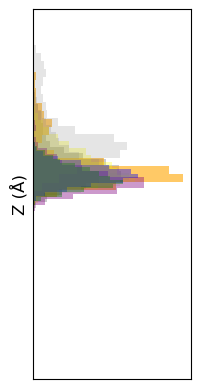

In [ ]:
# Side-by-side Histograms (One for Each Replica)
ax_hist = plt.subplot(gs[1])

for i in range(8):
    ax_hist.hist(com_z1_replicas[i], bins=50, orientation='horizontal', color=colors[i], alpha=alphas[i], histtype='bar', label=f'N{i+1}')

#ax_hist.hist(com_z3_replicas[1], bins=20, orientation='horizontal', color='black', alpha=0.9, histtype='stepfilled', label='Mem')
#ax_hist.hist(-com_z3_replicas[1], bins=20, orientation='horizontal', color='black', alpha=0.9, histtype='stepfilled', label='Mem')
ax_hist.set_xticks([])
ax_hist.set_yticks([])
ax_hist.set_ylabel('Z (Å)', fontsize=12)
plt.ylim(-25, 80)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


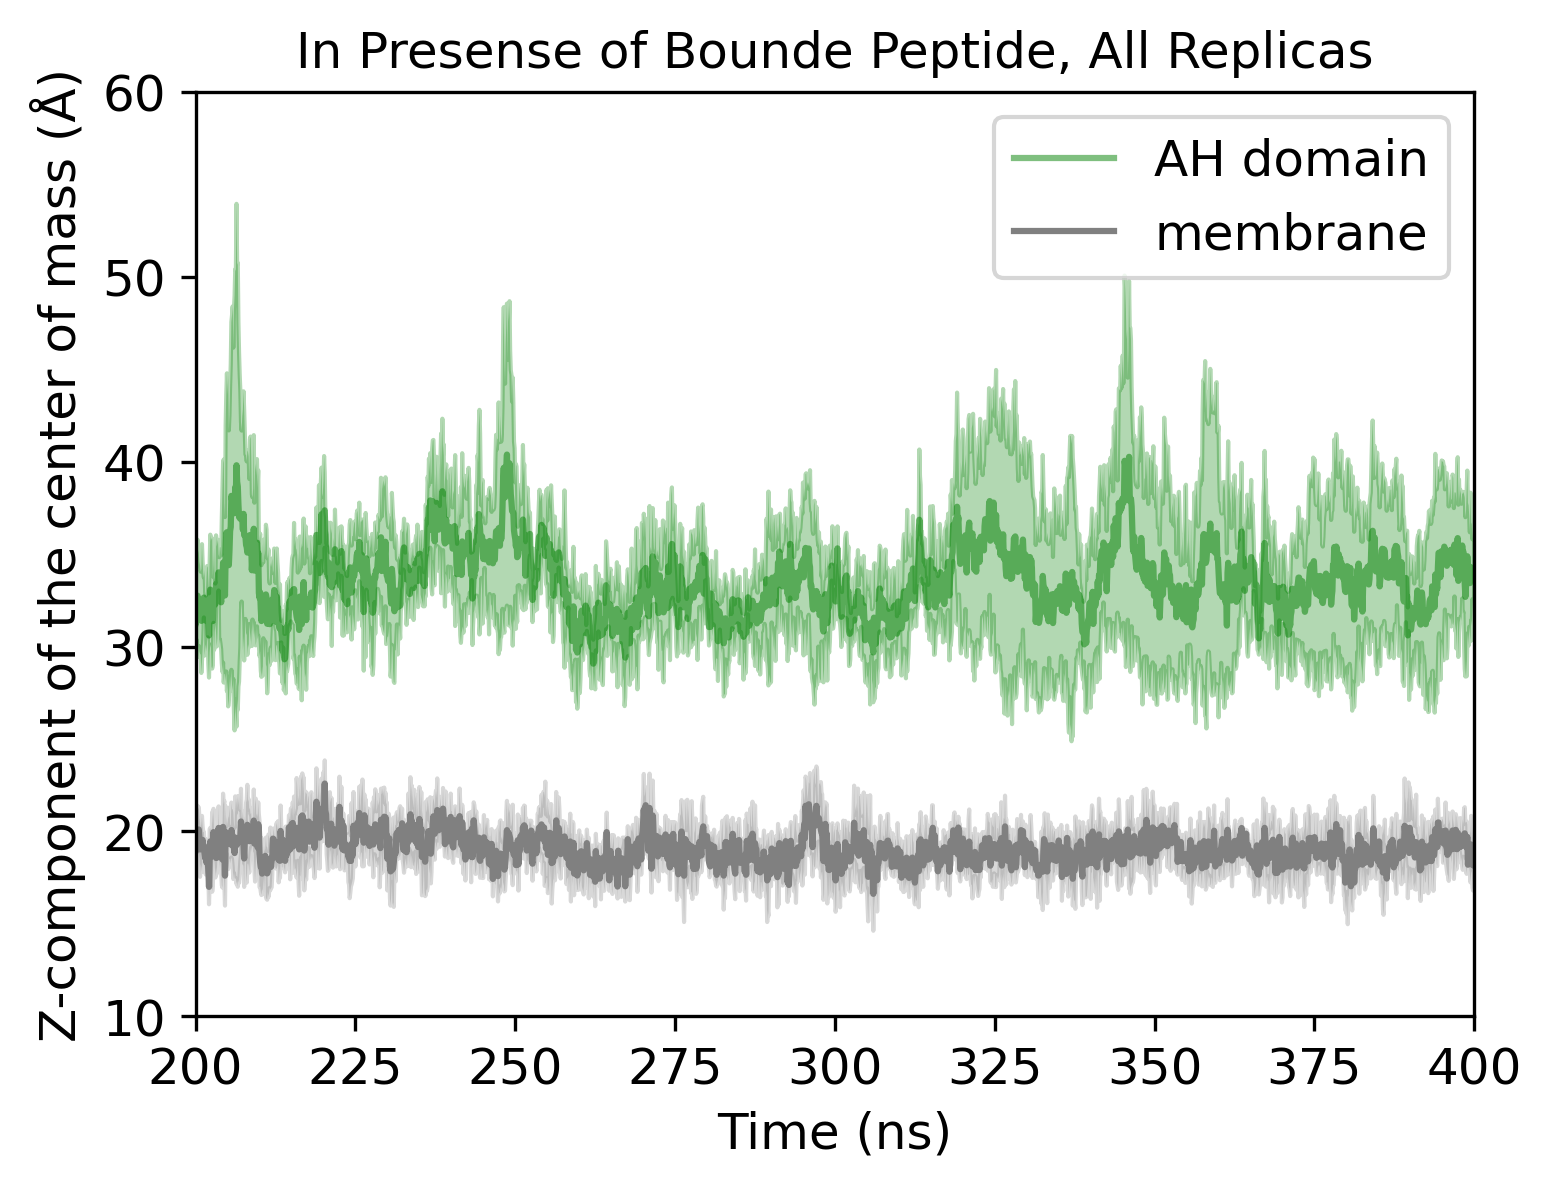

In [17]:
# Calculate the mean and standard deviation of the COM z-component over the replicas at each time step
com_z_mean = np.mean(com_z_replicas, axis=0)
com_z_std = np.std(com_z_replicas, axis=0)/2

com_z1_mean = np.mean(com_z1_replicas, axis=0)
com_z1_std = np.std(com_z1_replicas, axis=0)

com_z2_mean = np.mean(com_z2_replicas, axis=0)
com_z2_std = np.std(com_z2_replicas, axis=0)

com_z3_mean = np.median(com_z3_replicas, axis=0)
com_z3_std = np.std(com_z3_replicas, axis=0)

# Plot the z-component of the center of mass over time with shaded standard deviation
fig, ax = plt.subplots(figsize=(5.5,4),dpi=300)
#plt.plot(time_values, com_z_mean, label='C-term', color='red')
#plt.fill_between(time_values, com_z_mean - com_z_std, com_z_mean + com_z_std, color='red', alpha=0.3)

plt.plot(time_values, com_z1_mean, label='AH domain', color='green', alpha=0.5)
plt.fill_between(time_values, com_z1_mean - com_z1_std, com_z1_mean + com_z1_std, color='green', alpha=0.3)

#plt.plot(time_values, com_z2_mean, label='N-term', color='blue')
#plt.fill_between(time_values, com_z2_mean - com_z2_std, com_z2_mean + com_z2_std, color='blue', alpha=0.3)

plt.plot(time_values, com_z3_mean, label='membrane', color='gray')
plt.fill_between(time_values, com_z3_mean - com_z3_std, com_z3_mean + com_z3_std, color='gray', alpha=0.3)


plt.xlabel('Time (ns)',fontsize=12)
plt.ylabel('Z-component of the center of mass (Å)',fontsize=12)
plt.title('In Presense of Bounde Peptide, All Replicas')
plt.legend(loc="upper right",fontsize=12)
plt.xlim(200, 400)
plt.ylim(10, 60)
plt.yticks(rotation=0,fontsize=12)
plt.xticks(rotation=0,fontsize=12)

plt.savefig(f'z_time_{Z}__all.png',bbox_inches="tight")
#plt.savefig(f'z_time_{Z}__all.eps', format='eps')
#np.savetxt('dihedral_angles_surface.txt', Dihed, delimiter='\t', header='\t'.join(Xlabels), comments='')


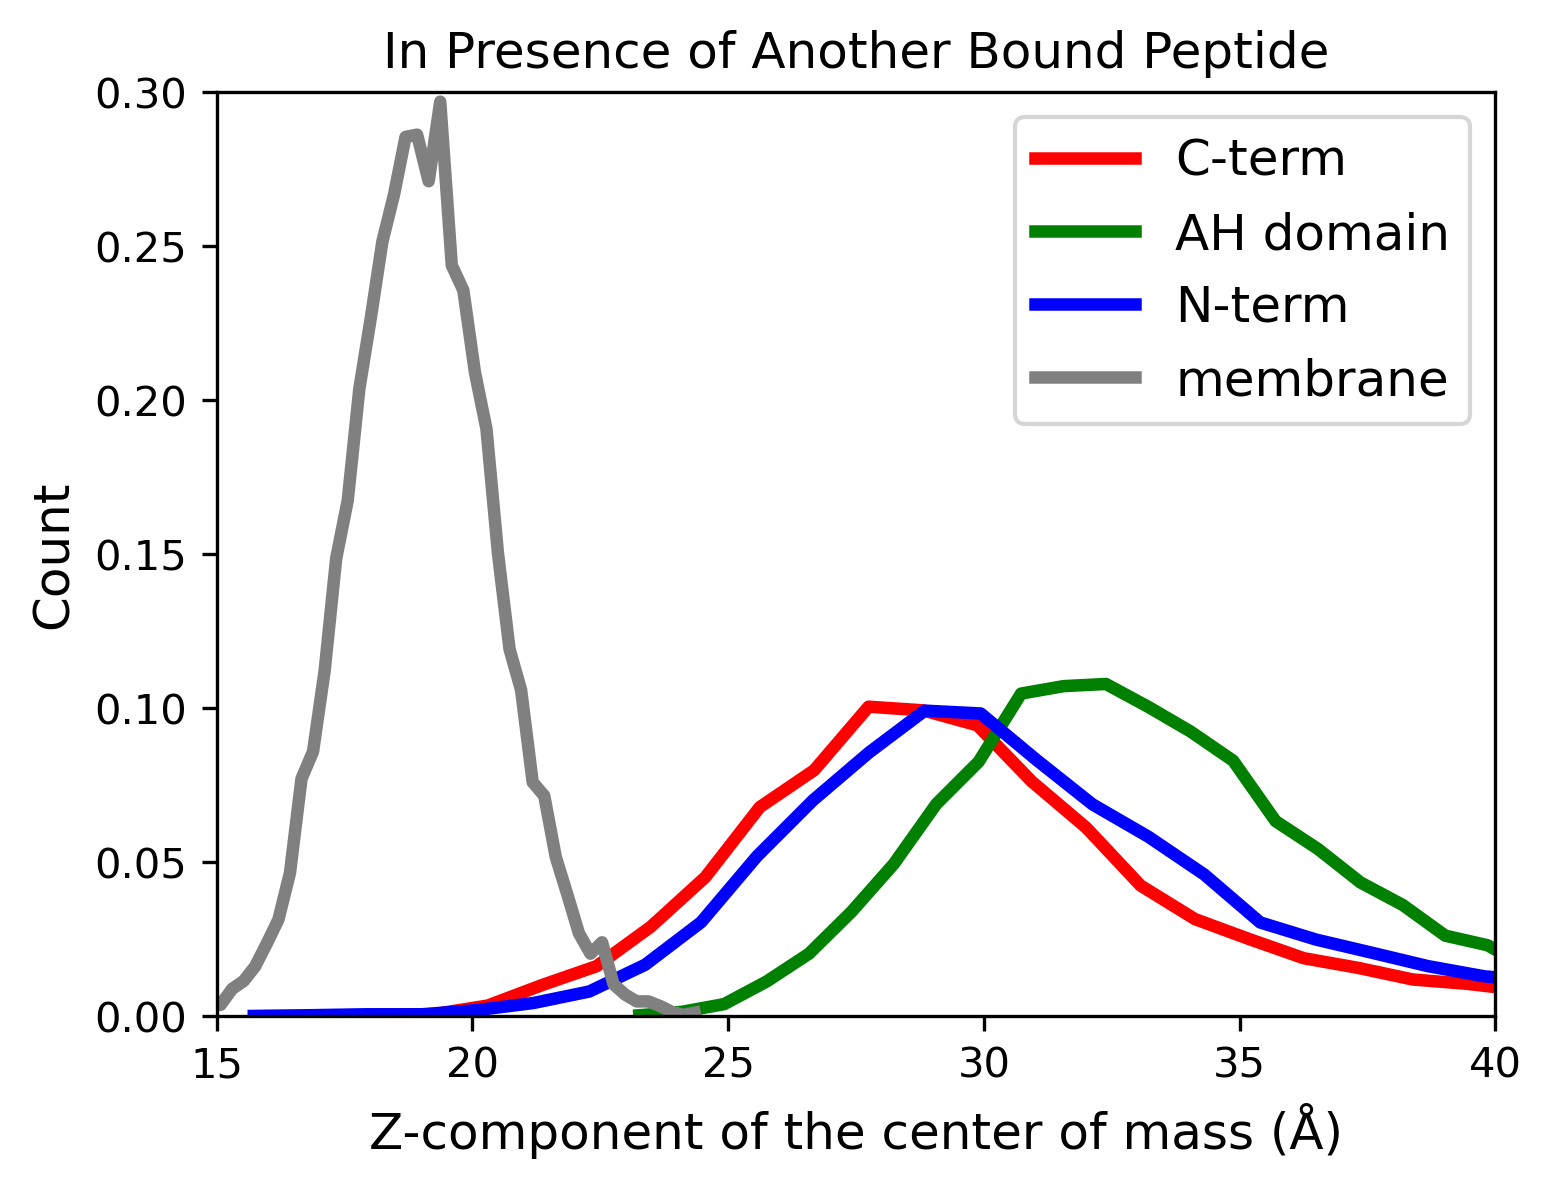

In [16]:
def makehist(data, datalabel, colormark):
  y,binEdges = np.histogram(data,bins=50)
  bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
  #bincenters = bincenters/10.0
  plt.plot(bincenters, y/np.trapz(y, bincenters), label=datalabel, lw =3, color=colormark)


array = np.array(com_z_replicas) [:, 1000:4000]
array1= np.array(com_z1_replicas)[:, 1000:4000]
array2= np.array(com_z2_replicas)[:, 1000:4000]
array3= np.array(com_z3_replicas)[:, 1000:4000]

comzre = np.reshape(array , (12000,1))
comzre1= np.reshape(array1, (12000,1))
comzre2= np.reshape(array2, (12000,1))
comzre3= np.reshape(array3, (12000,1))

fig, ax = plt.subplots(figsize=(5.5,4),dpi=300)
makehist( comzre, 'C-term', 'red')
makehist(comzre1, 'AH domain', 'green')
makehist(comzre2, 'N-term', 'blue')
makehist(comzre3, 'membrane', 'gray')
#makehist(com_z1_replicas[-500:], 'AH domain', 'green')
#makehist(com_z2_replicas[-500:], 'N-term', 'blue')


plt.xlabel('Z-component of the center of mass (Å)',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('In Presence of Another Bound Peptide',fontsize=12) #of distance from the membrane midline
plt.legend(loc="upper right",fontsize=12)
plt.xlim(15,40)
plt.ylim(0,0.3)

plt.savefig(f'z_histogram_{Z}__all.png',bbox_inches="tight")
#plt.savefig(f'z_histogram_{Z}__all.eps', format='eps')



In [ ]:
len(comzre)

In [5]:
dist_arr = distances.distance_array(float_ca.positions, # reference
                                    bound_ca.positions, # configuration
                                    box=u.dimensions)
dist_arr.shape

res_dist = distances.distance_array(float_com, bound_com,
                                    box=u.dimensions)

NameError: name 'float_com' is not defined

NameError: name 'res_dist' is not defined

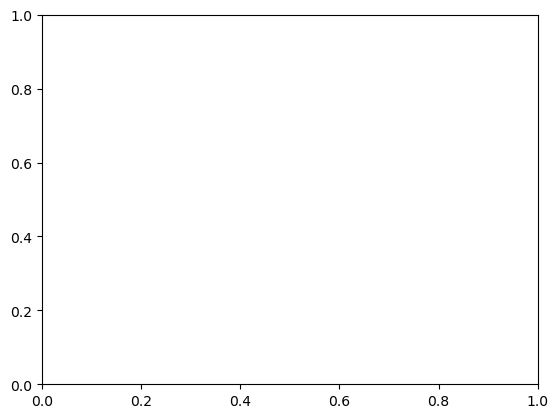

In [6]:
# Calculating residue-to-residue distances
fig2, ax2 = plt.subplots()
im2 = ax2.imshow(res_dist, origin='upper')

# add residue ID labels to axes
tick_interval = 5
ax2.set_yticks(np.arange(n_float)[::tick_interval])
ax2.set_xticks(np.arange(n_bound)[::tick_interval])
ax2.set_yticklabels(float_ca.residues.resids[::tick_interval])
ax2.set_xticklabels(bound_ca.residues.resids[::tick_interval])

# add figure labels and titles
plt.ylabel('floating peptide')
plt.xlabel('bound peptide')
plt.title('Distance between center-of-mass')

# colorbar
cbar2 = fig2.colorbar(im)
cbar2.ax.set_ylabel('Distance (Angstrom)')

Text(0, 0.5, 'Distance (Angstrom)')

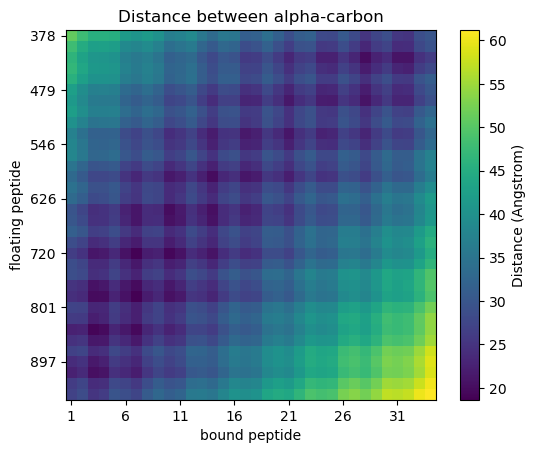

In [7]:
# Plotting distance as a heatmap
fig, ax = plt.subplots()
im = ax.imshow(dist_arr, origin='upper')

# add residue ID labels to axes
tick_interval = 5
ax.set_yticks(np.arange(n_float)[::tick_interval])
ax.set_xticks(np.arange(n_bound)[::tick_interval])
ax.set_yticklabels(float_ca.resids[::tick_interval])
ax.set_xticklabels(bound_ca.resids[::tick_interval])

# add figure labels and titles
plt.ylabel('floating peptide')
plt.xlabel('bound peptide')
plt.title('Distance between alpha-carbon')

# colorbar
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('Distance (Angstrom)')


# averaging between seeds

In [8]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# Number of replicas
num_replicas = 4

# Get the atom selection for the specified residue IDs
residue_ids = [446,463,479,501,523,534,551,570] # C-term 
residue_ids1 = [138,157,172,187,206,223,230,252,268,290,312,331,346,361,378,394,416,427] # AH domain
residue_ids2 = [4,19,43,62,86,105,119,126]  # N-term

# Initialize lists to store COM data for each replica
com_z_replicas = [[] for _ in range(num_replicas)]
com_z1_replicas = [[] for _ in range(num_replicas)]
com_z2_replicas = [[] for _ in range(num_replicas)]
time_values = []

# Loop over each replica
for replica in range(1, num_replicas + 1):
    # Load the trajectory and topology for the current replica
    folder_name = f'N{replica}'
    u = mda.Universe(f'{folder_name}/step5_input.pdb', f'{folder_name}/traj_continuous_v1_400.xtc')

    # Get the atom selection for the specified residue IDs
    # ... (Your existing residue ID selections here) ...

    # Empty lists to store the COM z-component and corresponding time for the current replica.
    com_z = []
    com_z1 = []
    com_z2 = []

    residue_selection = "resid " + " ".join(map(str, residue_ids))
    selected_residues = u.select_atoms(residue_selection)

    residue_selection1 = "resid " + " ".join(map(str, residue_ids1))
    selected_residues1 = u.select_atoms(residue_selection1)
    
    residue_selection2 = "resid " + " ".join(map(str, residue_ids2))
    selected_residues2 = u.select_atoms(residue_selection2)

    # Iterate over each frame in the trajectory.
    for ts in u.trajectory:
        # Calculate the center of mass for the selected residues.
        com = selected_residues.center_of_mass(compound='residues')
        com1 = selected_residues1.center_of_mass(compound='residues')
        com2 = selected_residues2.center_of_mass(compound='residues')

        com_ave = np.mean(com, axis=0)
        com_ave1 = np.mean(com1, axis=0)
        com_ave2 = np.mean(com2, axis=0)
        
        com_z.append(com_ave[2])  # Z-component is at index 2 in the COM array.
        com_z1.append(com_ave1[2])
        com_z2.append(com_ave2[2])

    time_values = [ts.time for ts in u.trajectory]
    time_values = np.array(time_values) / 1000  # ps to ns

    # Store the COM z-component data for the current replica
    com_z_replicas[replica - 1] = com_z
    com_z1_replicas[replica - 1] = com_z1
    com_z2_replicas[replica - 1] = com_z2

# Calculate the mean and standard deviation of the COM z-component over the replicas at each time step
com_z_mean = np.mean(com_z_replicas, axis=0)/2
com_z_std = np.std(com_z_replicas, axis=0)/2

com_z1_mean = np.mean(com_z1_replicas, axis=0)/2
com_z1_std = np.std(com_z1_replicas, axis=0)/2

com_z2_mean = np.mean(com_z2_replicas, axis=0)/2
com_z2_std = np.std(com_z2_replicas, axis=0)/2




FileNotFoundError: [Errno 2] No such file or directory: 'N1/step5_input.pdb'

In [9]:
# Plot the z-component of the center of mass over time with shaded standard deviation
fig = plt.figure(dpi=300)
plt.plot(time_values, com_z_mean, label='C-term', color='red')
plt.fill_between(time_values, com_z_mean - com_z_std, com_z_mean + com_z_std, color='red', alpha=0.3)

plt.plot(time_values, com_z1_mean, label='AH domain', color='green', alpha=0.5)
plt.fill_between(time_values, com_z1_mean - com_z1_std, com_z1_mean + com_z1_std, color='green', alpha=0.3)

plt.plot(time_values, com_z2_mean, label='N-term', color='blue')
plt.fill_between(time_values, com_z2_mean - com_z2_std, com_z2_mean + com_z2_std, color='blue', alpha=0.3)

plt.xlabel('Time (ns)')
plt.ylabel('Z-component of the center of mass (Å)')
plt.title('Extended AH in solution (Average over 4 Replicas)')
plt.legend(loc="upper right")
plt.xlim(50, 100)
plt.ylim(10, 60)
plt.show()

NameError: name 'com_z_mean' is not defined

<Figure size 1920x1440 with 0 Axes>

In [ ]:
# Smooth the data using a moving average with a window size of 5 data points
window_size = 5
time_values_smoothed = time_values[window_size//2 : -(window_size//2)]  # Adjust time_values to match smoothed data

com_z_mean_smoothed = np.convolve(com_z_mean, np.ones(window_size)/window_size, mode='valid')/10
com_z_std_smoothed = np.convolve(com_z_std, np.ones(window_size)/window_size, mode='valid')/10

com_z1_mean_smoothed = np.convolve(com_z1_mean, np.ones(window_size)/window_size, mode='valid')/10
com_z1_std_smoothed = np.convolve(com_z1_std, np.ones(window_size)/window_size, mode='valid')/10

com_z2_mean_smoothed = np.convolve(com_z2_mean, np.ones(window_size)/window_size, mode='valid')/10
com_z2_std_smoothed = np.convolve(com_z2_std, np.ones(window_size)/window_size, mode='valid')/10

In [ ]:
# Plot the z-component of the center of mass over time with shaded standard deviation
fig = plt.figure(dpi=300)
plt.plot(time_values_smoothed, com_z_mean_smoothed, label='C-term', color='red')
plt.fill_between(time_values_smoothed, com_z_mean_smoothed - com_z_std_smoothed, com_z_mean_smoothed + com_z_std_smoothed, color='red', alpha=0.3)

plt.plot(time_values_smoothed, com_z1_mean_smoothed, label='AH domain', color='green', alpha=0.5)
plt.fill_between(time_values_smoothed, com_z1_mean_smoothed - com_z1_std_smoothed, com_z1_mean_smoothed + com_z1_std_smoothed, color='green', alpha=0.3)

plt.plot(time_values_smoothed, com_z2_mean_smoothed, label='N-term', color='blue')
plt.fill_between(time_values_smoothed, com_z2_mean_smoothed - com_z2_std_smoothed, com_z2_mean_smoothed + com_z2_std_smoothed, color='blue', alpha=0.3)

plt.xlabel('Time (ns)')
plt.ylabel('Z-component of the center of mass (nm)')
plt.title('Extended AH in solution (Average over 4 Replicas)')
plt.legend(loc="upper right")
plt.xlim(50, 100)
plt.ylim(1, 6)
plt.show()